# <font color="#36648B">Data Visualization & Dimensionality Reduction</font>
#### Created by Andres Segura-Tinoco
#### Created on 05/03/2021

In [1]:
# DS libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## <font color="#36648B">1. Initial Exploration of IRIS data</font>

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
https://archive.ics.uci.edu/ml/datasets/iris

In [3]:
# import some data to play with
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# Showing some stats
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# We only take the first two features to plot
X = iris.data[:, :2]
y = iris.target

# Calculate limits
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

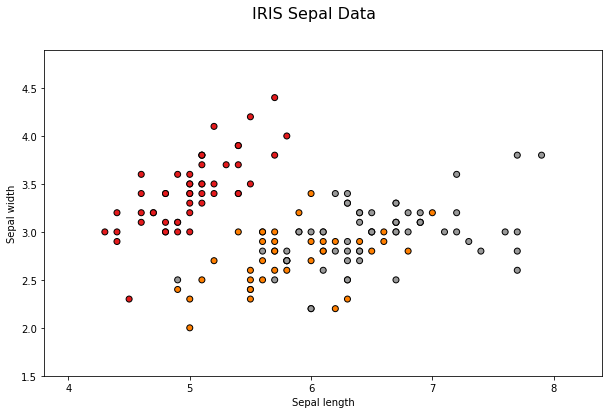

In [6]:
# Plot the training points
fig = plt.figure(1, figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.suptitle("IRIS Sepal Data", fontsize=16)
plt.show()

#### Result
Non-linearly separable data.

## <font color="#36648B">2. Dimensionality Reduction</font>


### 2.1. Principal Component Analysis (PCA)

In [7]:
# Apply PCA
pca = PCA(n_components=4)
pca_data = pca.fit_transform(iris.data)

In [8]:
# Show variance explained by each component
list(pca.explained_variance_ratio_)

[0.9246187232017271,
 0.05306648311706782,
 0.017102609807929763,
 0.005212183873275374]

In [9]:
# Calculate limits
x_min, x_max = pca_data[:, 0].min() - .5, pca_data[:, 0].max() + .5
y_min, y_max = pca_data[:, 1].min() - .5, pca_data[:, 1].max() + .5

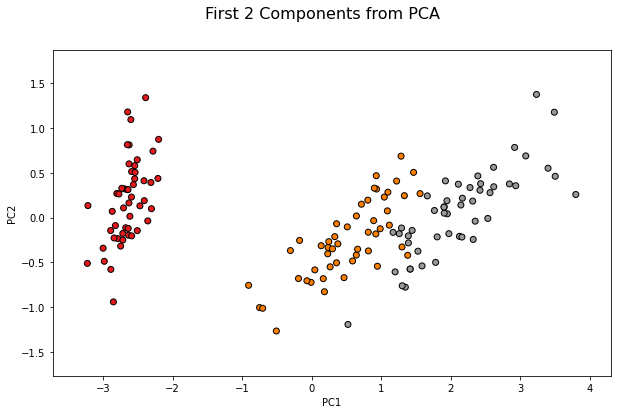

In [10]:
# Plot first 2 Components
fig = plt.figure(2, figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.suptitle("First 2 Components from PCA", fontsize=16)
plt.show()

#### Bonus: 3D plot

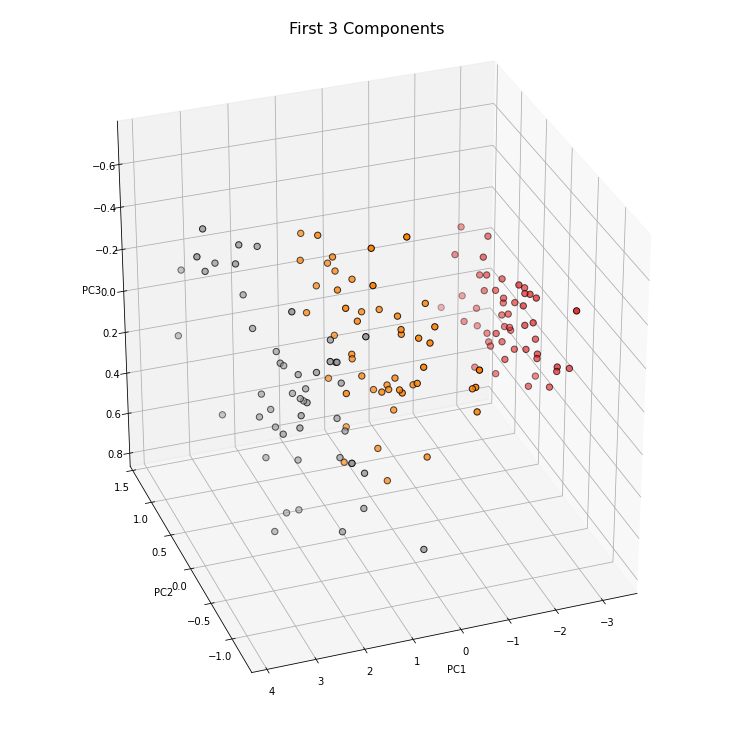

In [11]:
# Plot first 3 Components
fig = plt.figure(2, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.suptitle("First 3 Components", fontsize=16)
plt.show()

#### Result
Linear separable data.

### 2.2. Linear Discriminant Analysis (LDA)

In [12]:
# Apply LDA
lda = LDA()
lda_data = lda.fit_transform(iris.data, iris.target)

In [13]:
# Show variance explained by each component
list(lda.explained_variance_ratio_)

[0.9912126049653671, 0.008787395034632772]

In [14]:
# Calculate limits
x_min, x_max = lda_data[:, 0].min() - .5, lda_data[:, 0].max() + .5
y_min, y_max = lda_data[:, 1].min() - .5, lda_data[:, 1].max() + .5

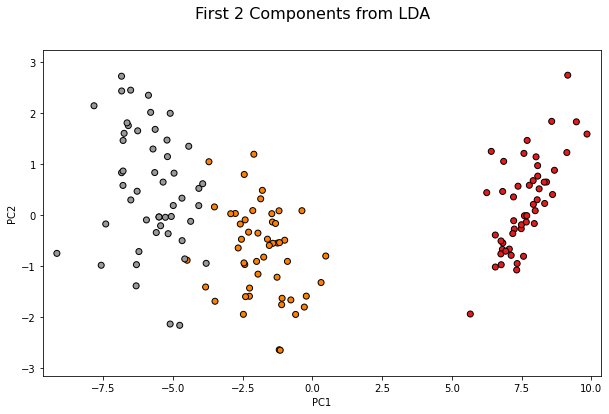

In [15]:
# Plot first 2 Components
fig = plt.figure(2, figsize=(10, 6))
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.suptitle("First 2 Components from LDA", fontsize=16)
plt.show()

#### Result
Linear separable data too.

## <font color="#36648B">3. Understanding the Results of the PCA</font>

In [16]:
# Create and show principal components DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3", "PC4"])
pca_df

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


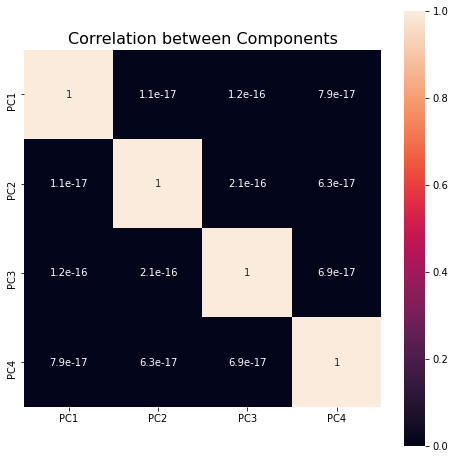

In [17]:
# Show correlation between components
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(pca_df.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

#### Result
There is no correlation, because the principal components are orthogonal.

In [18]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

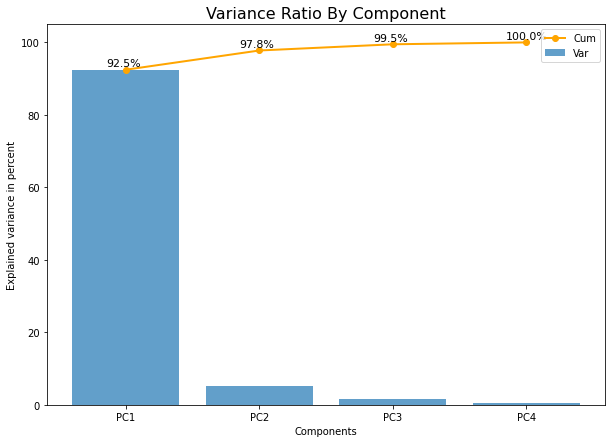

In [19]:
# Plot Pareto chart
fig, ax2 = plt.subplots(figsize = (10, 7))

plt.bar(y_pos, values, align="center", alpha=0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color="orange", linewidth=2, marker="o")

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color="black", fontweight="normal", fontsize=11)

plt.xlabel("Components")
plt.ylabel("Explained variance in percent")
plt.title("Variance Ratio By Component", fontsize=16)
plt.legend(("Cum", "Var"), loc="best")
plt.show()

#### Result
In the first 2 PCs, 97.8% of the explained variance is found.